# Primate Hand Proportions

![](images/handproportions_plot.png)

The data underlying this plot are included in the supplementary material of the paper and have been extracted and made available in my bioanth datasets repository.

## Preliminaries

First, I always change the R option for importing strings (I find that the default convert to factor causes more problems than it solves).

In [1]:
options(stringsAsFactors=F)

You can safely ignore this next option. The default image rendering option for the system I am using here (Jupyter Notebook) does not show italic annotations on plots properly; this option change fixes that. Standard R on your system will work as it should without this option change.

In [2]:
options(jupyter.plot_mimetypes = 'image/png')


Next, import the data. The resulting data frame has five variables: status (extant or extinct), taxon, pCARP (proportion that is the carpus), pMC3 (proportion that is metacarpal 3), pD3 (proportion that is the phalanges; excluding the terminal phalange).

In [3]:
dataurl = "https://raw.githubusercontent.com/ryanraaum/bioanth-datasets/master/raw/primatehandproportions.csv"
dset = read.csv(url(dataurl), row.names=1)
str(dset)

'data.frame':	53 obs. of  5 variables:
 $ status: chr  "Extant" "Extant" "Extant" "Extant" ...
 $ taxon : chr  "Lorisoidea" "Lorisoidea" "Lorisoidea" "Lorisoidea" ...
 $ pCARP : num  19.1 19.5 16.6 17.7 15.1 13.9 16.2 14 15.8 15.5 ...
 $ pMC3  : num  23.7 24.6 23.8 23.3 24.5 24.2 27.2 27 26.6 28.2 ...
 $ pD3   : num  57.2 55.9 59.6 59.1 60.4 61.9 56.4 59 57.6 56.3 ...


The published plot has different colors and shapes for different taxonomic groups, so it will be useful to have mappings and variables for those.

In [4]:
groups = unique(dset$taxon)
groups

[1] "Lorisoidea"      "Lemuroidea"      "Tarsius"         "Platyrrhini"    
[5] "Catarrhini"      "Ptilocercus"     "Tupaia"          "Cynocephalus"   
[9] "Fossil Primates"

To generate the point fill color, shape, and size variables, I first create mapping vectors.

In [5]:
map_colors = c("darkgoldenrod1", "tomato3", "mediumpurple3", "mediumseagreen", 
                 "dodgerblue3", "yellow", "orange", "white", "black")
names(map_colors) = groups

map_shapes = c(21, 21, 23, 22, 22, 24, 24, 24, 21)
names(map_shapes) = groups

map_sizes = c(1, 1, 0.75, 1.5, 1.5, 0.75, 0.75, 0.75, 1)
names(map_sizes) = groups

map_colors
map_shapes
map_sizes

Lorisoidea       Lemuroidea          Tarsius      Platyrrhini 
"darkgoldenrod1"        "tomato3"  "mediumpurple3" "mediumseagreen" 
      Catarrhini      Ptilocercus           Tupaia     Cynocephalus 
   "dodgerblue3"         "yellow"         "orange"          "white" 
 Fossil Primates 
         "black"

Lorisoidea      Lemuroidea         Tarsius     Platyrrhini      Catarrhini 
             21              21              23              22              22 
    Ptilocercus          Tupaia    Cynocephalus Fossil Primates 
             24              24              24              21

Lorisoidea      Lemuroidea         Tarsius     Platyrrhini      Catarrhini 
           1.00            1.00            0.75            1.50            1.50 
    Ptilocercus          Tupaia    Cynocephalus Fossil Primates 
           0.75            0.75            0.75            1.00

Next, variables with an entry for each data table entry.

In [6]:
point_colors = map_colors[dset$taxon]
point_shapes = map_shapes[dset$taxon]
point_sizes = map_sizes[dset$taxon]

# bind these together into a data frame to show what has been done
cbind(rownames(dset), dset$taxon, point_colors, point_shapes, point_sizes)

,,,point_colors,point_shapes,point_sizes
Lorisoidea,Arctocebus calabarensis,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Loris tardigradus,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Nycticebus coucang,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Perodicticus potto,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Euoticus elegantulus,Lorisoidea,darkgoldenrod1,21,1
Lorisoidea,Galago moholi,Lorisoidea,darkgoldenrod1,21,1
Lemuroidea,Cheirogaleus major,Lemuroidea,tomato3,21,1
Lemuroidea,Microcebus murinus,Lemuroidea,tomato3,21,1
Lemuroidea,Phaner sp.,Lemuroidea,tomato3,21,1
Lemuroidea,Hapalemur griseus,Lemuroidea,tomato3,21,1


Set up the annotation species and label text.

In [62]:
# Adapis needs to be placed separately
ann_species = c("D. madagascarensis", "Darwinius", "Tupaia glis", "Cynocephalus volans", "Nannodectes", 
            "Europolemur", "Godinotia", "Leptadapis", "Papio sp.")
ann_labels  = c("Daubentonia", "Darwinius", "Tupaia", "Cynocephalus", "Nannodectes",
            "Europolemur", "Godinotia", "Leptadapis", "Papio")
ann_pos     = c(4, 2, 4, 4, 4, 2, 4, 2, 4)  # used in base R and lattice plots
ann_hjust   = c(1, 0, 1, 1, 1, 0, 1, 0, 1)  # used in ggplot2 plot

cbind(ann_species, ann_labels, ann_pos, ann_hjust)

ann_species,ann_labels,ann_pos,ann_hjust
D. madagascarensis,Daubentonia,4,1
Darwinius,Darwinius,2,0
Tupaia glis,Tupaia,4,1
Cynocephalus volans,Cynocephalus,4,1
Nannodectes,Nannodectes,4,1
Europolemur,Europolemur,2,0
Godinotia,Godinotia,4,1
Leptadapis,Leptadapis,2,0
Papio sp.,Papio,4,1


Set up a group names vector for the legend in the desired order.

In [8]:
gnames = c('Fossil Primates', 'Catarrhini', 'Platyrrhini', 'Tarsius', 'Lorisoidea', 
           'Lemuroidea', 'Ptilocercus', 'Tupaia', 'Cynocephalus')

## Base R

Triangle plots are not specifically included in the base R graphics toolkit, but there is an implementation in the `ade4` package that is built on the standard plotting tools. 

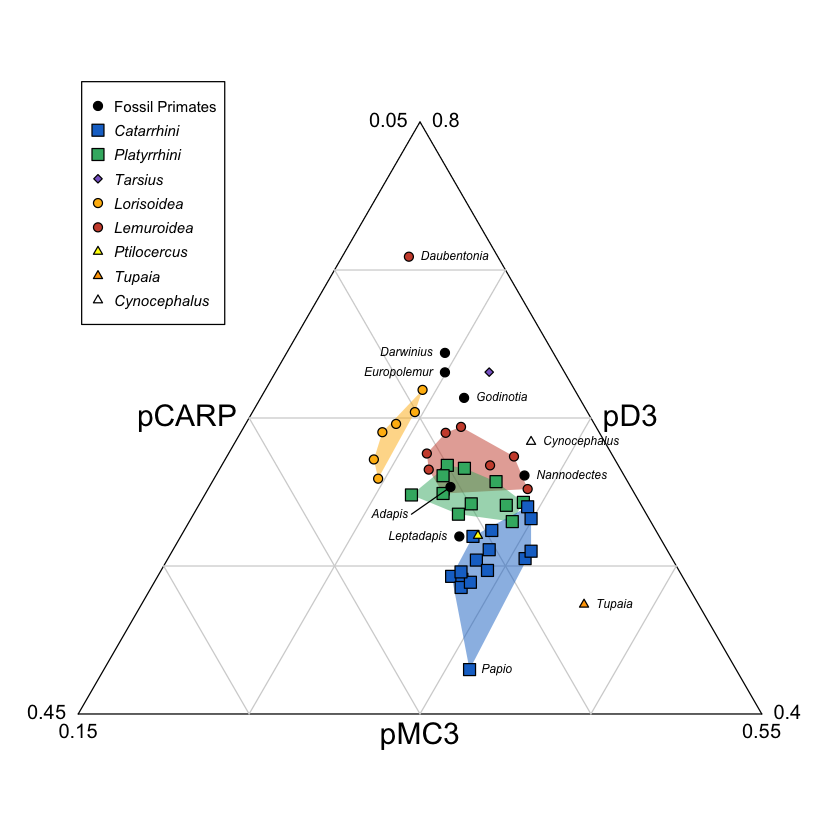

In [9]:
library(ade4)      # for the triangle.plot function
library(grDevices) # for the convex hulls

# the triangle plot invisibly returns the plot coordinates of the points
# we will need this to draw the convex hull polygons on the published plot
# as well as to style the points (no style options in the function itself)
coords = triangle.plot(dset[,c("pCARP", "pMC3", "pD3")],
                       show.position=F, # don't show position of displayed triangle in complete triangle,
                       cpoint=0,        # don't plot points yet (no point format options in this function)

                       # only doing the following to try to exactly match published plot, 
                       # not necessary otherwise
                       scale=F,             # don't autoset the axis limits
                       min3=c(.05,.15,.40), # axis minimums
                       max3=c(.45,.55,.80)  # axis maximums
                      )

# extract out the points for each group that will get a convex hull polygon
loris = coords[dset$taxon == "Lorisoidea",]
lemur = coords[dset$taxon == "Lemuroidea" & rownames(dset) != "D. madagascarensis",]
platy = coords[dset$taxon == "Platyrrhini",]
catar = coords[dset$taxon == "Catarrhini",]

# extract the points bounding the convex hull polygons
lorishp = chull(loris)
lemurhp = chull(lemur)
platyhp = chull(platy)
catarhp = chull(catar)

# add the first point to the end so that the polygon closes
lorishp = c(lorishp, lorishp[1])
lemurhp = c(lemurhp, lemurhp[1])
platyhp = c(platyhp, platyhp[1])
catarhp = c(catarhp, catarhp[1])

# plot the polygons
polygon(loris[lorishp,], col=adjustcolor(map_colors["Lorisoidea"], alpha=0.5), border=NA)
polygon(lemur[lemurhp,], col=adjustcolor(map_colors["Lemuroidea"], alpha=0.5), border=NA)
polygon(platy[platyhp,], col=adjustcolor(map_colors["Platyrrhini"], alpha=0.5), border=NA)
polygon(catar[catarhp,], col=adjustcolor(map_colors["Catarrhini"], alpha=0.5), border=NA)

# add the points with specified colors, shapes, and sizes
points(coords, pch=point_shapes, bg=point_colors, cex=point_sizes)

# add the annotations
for (i in 1:length(ann_species)) {
    xpt = coords[ann_species[i],1]
    ypt = coords[ann_species[i],2]
    text(xpt, ypt, ann_labels[i], pos=ann_pos[i], cex=0.6, font=3)
}

# Special placement for Adapis with a line to the point
# rather than try to figure out coordinate values, just mix and match from other points
xpt = coords["Chiropotes sp.", 1]
ypt = coords["Cebus sp.", 2]
text(xpt, ypt, 'Adapis ', adj=1, cex=0.6, font=3)
lines(c(xpt, coords["Adapis", 1]), c(ypt, coords["Adapis", 2]))

# add the legend
legend(x=-0.7, y=0.9, # coordinates arrived at by trial and error
       legend=gnames, cex=0.75,
       text.font=c(1,3,3,3,3,3,3,3,3),
       pch=map_shapes[gnames], 
       pt.bg=map_colors[gnames], 
       pt.cex=map_sizes[gnames])

## ggplot2

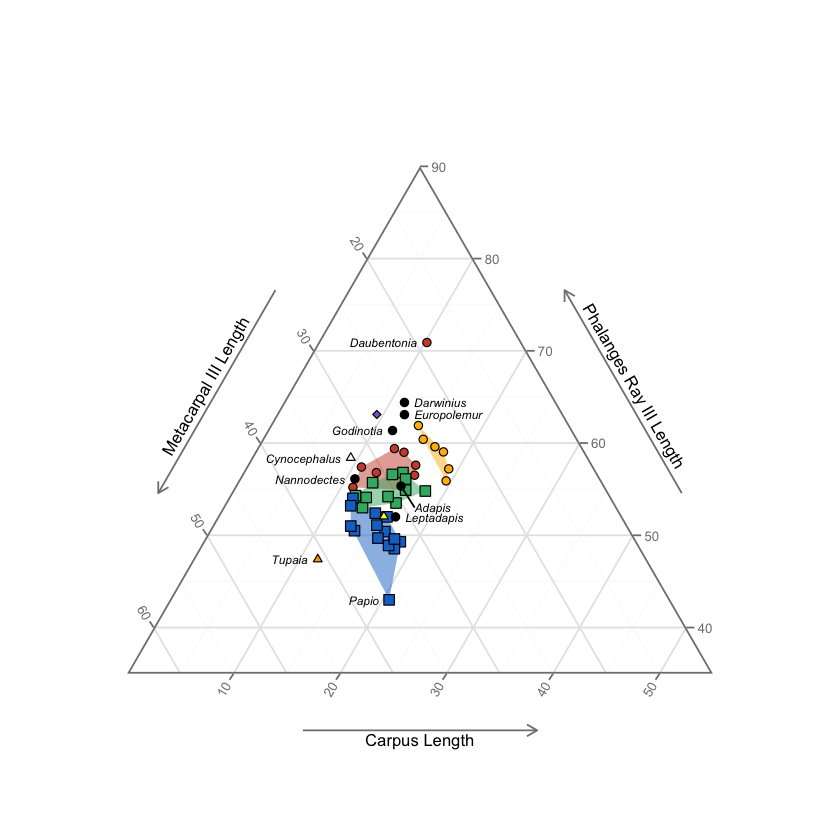

In [87]:
library(ggplot2)
library(ggtern) # ggtern = ggternary = triangle plot

# make a data frame with only the variables we are plotting
ggdata = data.frame(x=dset$pMC3,
                    y=dset$pD3,
                    z=dset$pCARP)
row.names(ggdata) = row.names(dset)

# will need the 2d coordinates for the x,y,z points
# to identify the outer points of the convex hulls
coords = tlr2xy(ggdata, coord_tern())

# extract out the points for each group that will get a convex hull polygon
loris = coords[dset$taxon == "Lorisoidea",]
lemur = coords[dset$taxon == "Lemuroidea" & rownames(dset) != "D. madagascarensis",]
platy = coords[dset$taxon == "Platyrrhini",]
catar = coords[dset$taxon == "Catarrhini",]

# will also need these subsets with x,y,z coordinates
xyzloris = ggdata[dset$taxon == "Lorisoidea",]
xyzlemur = ggdata[dset$taxon == "Lemuroidea" & rownames(dset) != "D. madagascarensis",]
xyzplaty = ggdata[dset$taxon == "Platyrrhini",]
xyzcatar = ggdata[dset$taxon == "Catarrhini",]

# extract the points bounding the convex hull polygons
lorishp = chull(loris)
lemurhp = chull(lemur)
platyhp = chull(platy)
catarhp = chull(catar)

# add the first point to the end so that the polygon closes
lorishp = c(lorishp, lorishp[1])
lemurhp = c(lemurhp, lemurhp[1])
platyhp = c(platyhp, platyhp[1])
catarhp = c(catarhp, catarhp[1])

# make the plot
plt = ggtern(data=ggdata, aes(x,y,z)) + 
        theme_minimal() + 
        tern_limits(T=.9, L=.65, R=.55) + 
        theme_showarrows() + 
        labs(x="", xarrow="Metacarpal III Length",
             y="", yarrow="Phalanges Ray III Length",
             z="", zarrow="Carpus Length") +
        geom_polygon(data=xyzloris[lorishp,], fill=adjustcolor(map_colors["Lorisoidea"], alpha=0.5)) +
        geom_polygon(data=xyzlemur[lemurhp,], fill=adjustcolor(map_colors["Lemuroidea"], alpha=0.5)) +
        geom_polygon(data=xyzplaty[platyhp,], fill=adjustcolor(map_colors["Platyrrhini"], alpha=0.5)) +
        geom_polygon(data=xyzcatar[catarhp,], fill=adjustcolor(map_colors["Catarrhini"], alpha=0.5)) +
        geom_point(pch=point_shapes, bg=point_colors, cex=point_sizes*2)

# add the easy point annotations
anndata = ggdata[ann_species,]
plt = plt + geom_text(data=anndata, label=paste("   ", ann_labels, "   ", sep=''), 
                      size=2.5, fontface="italic", hjust=ann_hjust)

# Special placement for Adapis with a line to the point
# (had to use trial and error to get the x,y,z coordinates)
adapisLabelXYZ = data.frame(x=29, y=53, z=18)
plt = plt + geom_text(data=adapisLabelXYZ, label="Adapis", 
                      size=2.5, fontface="italic", hjust=0) +
            geom_line(data=rbind(ggdata["Adapis",], adapisLabelXYZ))

plt

## lattice

Again, there is no triangle plot function included in the standard lattice distribution, but the `loa` (Lattice Options and Add-Ins) package includes an implementation built on top of lattice.

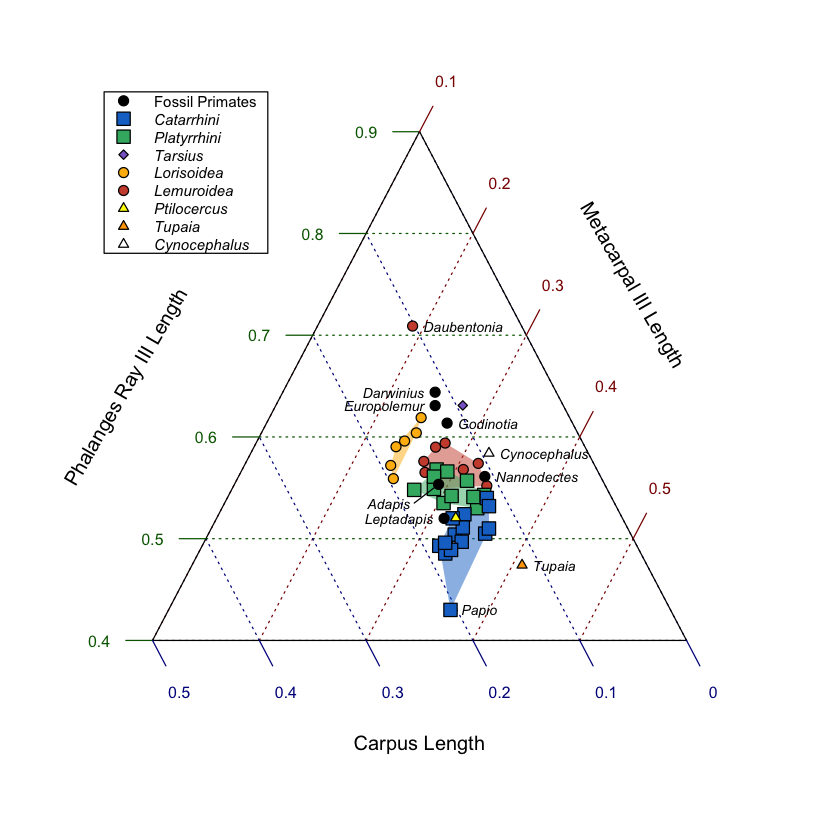

In [35]:
library(lattice)
library(latticeExtra) # to combine lattice plots with "as.layer"
library(loa)

# First set up the axes and labels.
# This function does not accomodate adding points, polygons, and annotations.
base = trianglePlot(~pD3+pMC3+pCARP, data=dset, 
                    type='n', # don't plot any points
                    alab="Phalanges Ray III Length",
                    blab="Metacarpal III Length",
                    clab="Carpus Length")

# get the new (x,y) coordinates of the data points on the plot area
toXY = with(dset, triABC2XY(pD3, pMC3, pCARP))
# 'toXY' from above is a list, pull out the x and y coordinates and make a data frame
dsetXY = data.frame(x=toXY$x, y=toXY$y, row.names=rownames(dset))

# create a custom convex hull plotting panel function
# * this is a little brittle - it assumes that in the given data frame:
#      - x values are in the first column
#      - y values are in the second column
panel.chull = function(dframe, ...) {
  # identify the exterior points
  hullpoints = chull(dframe)
  # add the first point to the end so that the polygon closes
  hullpoints = c(hullpoints, hullpoints[1])
  # plot the polygon
  panel.polygon(x=dframe[hullpoints,1],y=dframe[hullpoints,2], ...)
}

# pp = points & polygons
pp = xyplot(y ~ x, data=dsetXY,
             panel=function(x,y) {
               # First plot the convex hull polygons.
               # For these convex hull polygons, I subset out the points for each group from the
               #   overall data frame and feed that subset into the custom convex hull panel
               #   function from just above.
               # The color fills are derived from the point colors by reducing opacity using
               #   the adjustcolor function
               panel.chull(dsetXY[dset$taxon == "Lorisoidea",], 
                           col=adjustcolor(map_colors["Lorisoidea"], alpha=0.5), border=NA)
               panel.chull(dsetXY[dset$taxon == "Lemuroidea" & rownames(dset) != "D. madagascarensis",], 
                           col=adjustcolor(map_colors["Lemuroidea"], alpha=0.5), border=NA)
               panel.chull(dsetXY[dset$taxon == "Platyrrhini",], 
                           col=adjustcolor(map_colors["Platyrrhini"], alpha=0.5), border=NA)
               panel.chull(dsetXY[dset$taxon == "Catarrhini",], 
                           col=adjustcolor(map_colors["Catarrhini"], alpha=0.5), border=NA)
               
               # then add the points on top of the polygons
               panel.xyplot(x,y,col="black",pch=point_shapes,fill=point_colors,cex=point_sizes)
            })

# annotations layer
lnames = xyplot(y ~ x, data=dsetXY,
                panel=function(x,y) {
                  # first loop through the easy annotations (easy = next to point)
                  for (i in 1:length(ann_species)) {
                    xpt = dsetXY[ann_species[i],1]
                    ypt = dsetXY[ann_species[i],2]
                    # paste an extra space on either side of the name to get some separation from the point
                    panel.text(xpt, ypt, paste(" ", ann_labels[i], " ", sep=''), pos=ann_pos[i], cex=0.7, font=3)
                  }
                  # Special placement for Adapis with a line to the point
                  # rather than try to figure out coordinate values, just mix and match from other points
                  xpt = dsetXY["Chiropotes sp.", 1]
                  ypt = dsetXY["Cebus sp.", 2]
                  panel.text(xpt, ypt, 'Adapis ', adj=1, cex=0.7, font=3)
                  panel.lines(c(xpt, dsetXY["Adapis", 1]), c(ypt, dsetXY["Adapis", 2]), col=1)
                })

# combine all of the layers so far into a single plot
lplt = base + as.layer(pp) + as.layer(lnames) 

# specify the information for the key
key = list(points = list(
             pch = map_shapes[gnames],
             cex = map_sizes[gnames],
             col = "black",             # point border color
             fill=map_colors[gnames]),  # point fill color
           text = list(text=gnames, 
             cex=0.75,
             font=c(1,3,3,3,3,3,3,3,3)),
           corner=c(0.1,0.9),
           border=1,
           padding=1.5)

# add the key to the plot
lplt = update(lplt, key=key)

# show the plot
lplt